In [0]:
from google.colab import drive
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as img

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
michele = img.imread('/content/gdrive/My Drive/micheleboyd_70699459_106150380708098_6747831498182051626_n.jpg')
michele = tf.dtypes.cast(x=michele, dtype='float32')

In [0]:
michele_tensor = tf.reshape(
    tensor=michele,
    shape=(1, 855, 1080, 3),
    name="michele_tensor"
)

In [0]:
init_instance1 = tf.initializers.truncated_normal(mean=6.0, stddev=1.0)
a = init_instance1(shape=(1,10,10,1))

# No. of in_channels must be same as no_channels in input
kernel1 = init_instance1(shape=[2, 2, 1, 1])
kernel2 = init_instance1(shape=[2, 2, 3, 3])
print(a.shape)

(1, 10, 10, 1)


In [0]:
conv1 = tf.nn.conv2d(
    input=a,
    filter=kernel1,
    strides=1,
    padding='SAME',
    data_format='NHWC'
)

conv2 = tf.nn.conv2d(
    input=michele_tensor,
    filter=kernel2,
    strides=3,
    padding='SAME',
    data_format='NHWC'
)

print(conv2.shape)

(1, 285, 360, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


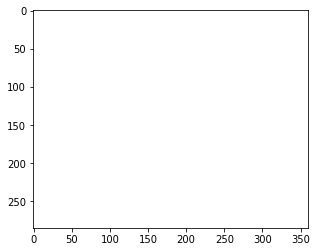

In [0]:
convolved_michele = tf.reshape(tensor=conv2, shape=(285, 360, 3))
with tf.Session() as sess:
  # print(sess.run(a))
  # print(sess.run(conv1))
  plt.imshow(sess.run(convolved_michele))